<a href="https://colab.research.google.com/github/addhyan2000/predictstockprice/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description This is a program which uses AI recurrent neural network called long short memory (LSTM) 

#Predicting the closing stock price of a corporation.
#using the past 60 day stock price

In [1]:
#Importing libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-03', end='2021-03-06')
#showing the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2021-03-01,127.930000,122.790001,123.750000,127.790001,115998300.0,127.790001
2021-03-02,128.720001,125.010002,128.410004,125.120003,102015300.0,125.120003
2021-03-03,125.709999,121.839996,124.809998,122.059998,112430400.0,122.059998


In [3]:
#get the number of rows and columns in dataset
df.shape

(2308, 6)

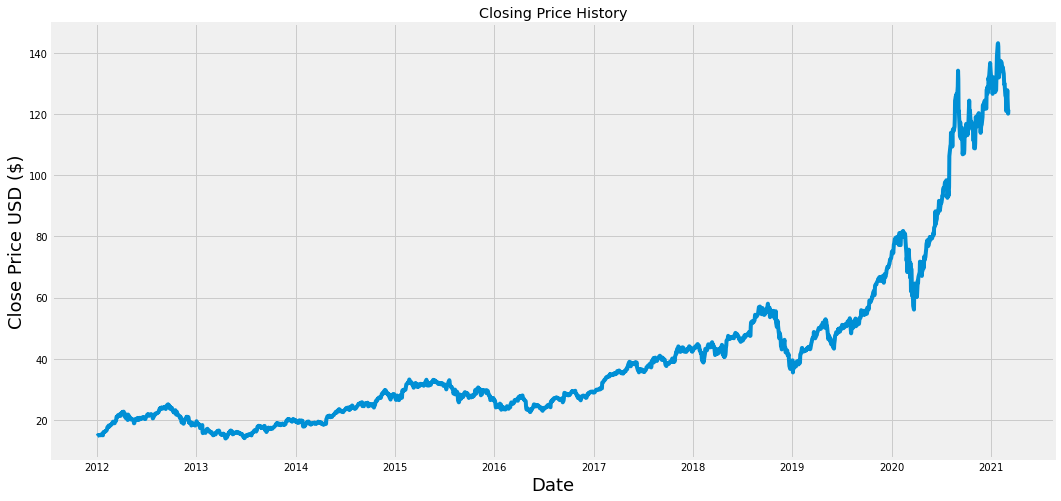

In [4]:
#Visualizing the closing price history
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
#Create a new data frame with only the close column
data = df.filter(['Close'])

#Convert the data frame to a  numpy
dataset = data.values

#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1847

In [6]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.83670306],
       [0.82176643],
       [0.83174999]])

In [8]:
#Create the training dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train datasets

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()



[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00822841, 0.01019361, 0.00825882,
       0.01551431, 0.01495322, 0.01568568, 0.01726944, 0.01822855,
       0.01814839, 0.01785265, 0.01911303, 0.02029878, 0.02164209,
       0.02381183, 0.02836966, 0.02843875, 0.03097611, 0.0328722 ,
       0.02961346, 0.03086831, 0.03084343, 0.034362  , 0.03386171,
       0.03478765, 0.03645157, 0.03737752, 0.04004478, 0.04198786,
       0.04254895, 0.0427452 , 0.03942288, 0.03862131, 0.03874017,
       0.04186349, 0.04274244, 0.04463025, 0.04908028, 0.05501734,
       0.05390621, 0.05390897, 0.05820147, 0.05954478, 0.05858842,
       0.05771501, 0.05680565, 0.05982669, 0.0618997 , 0.06276759])]
[0.06062272301844436]

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00

In [9]:
#Convert the x_train and y_train dataset to numpy arrays
x_train , y_train = np.array(x_train), np.array(y_train)

In [11]:
#Reshape the data
x_train = np.reshape(x_train , (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1787, 60, 1)

In [13]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))


In [14]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [16]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1787/1787 [==============================] - 48s 26ms/step - loss: 1.8134e-04


In [20]:
#Create the testing dataset
#Create a new array containing scaled value from index 1543 to 2003
test_data = scaled_data[training_data_len - 60 : , : ]

#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [21]:
#Convert the data to a numpy array 
x_test = np.array(x_test)

In [22]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [23]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [24]:
#Get the root mean squared error (RMSE) - measure of how accurate the model predicts the response  (lower is better)

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

12.10199202994721

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


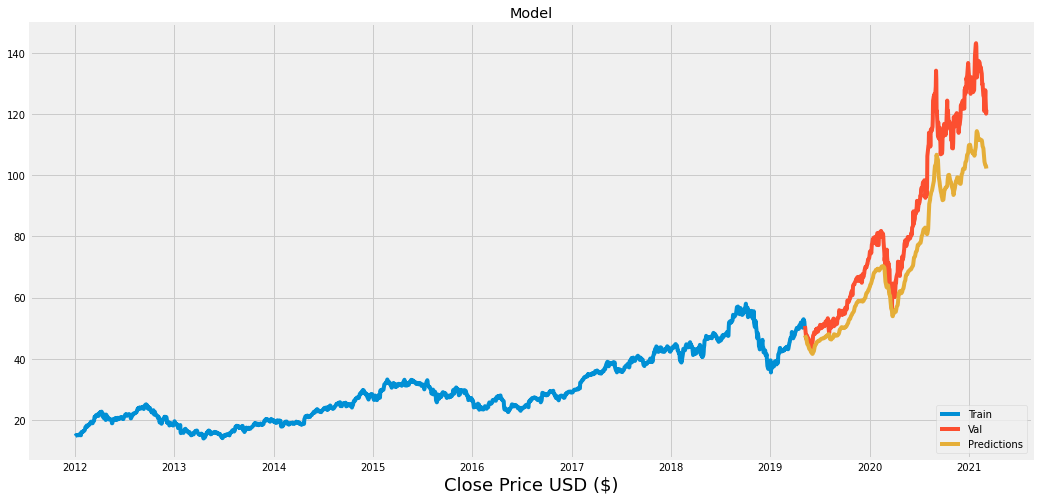

In [25]:
#Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions


#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.xlabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close' , 'Predictions']])
plt.legend(['Train' , 'Val' , 'Predictions'] , loc = 'lower right')
plt.show()

In [26]:
#Show the valid and predicted price
valid

,Close,Predictions
Date,,
2019-05-08,50.724998,47.702072
2019-05-09,50.180000,47.524609
2019-05-10,49.294998,47.266872
2019-05-13,46.430000,46.904907
2019-05-14,47.165001,46.206116
...,...,...
2021-03-01,127.790001,103.275940
2021-03-02,125.120003,103.181427
2021-03-03,122.059998,103.156509


In [28]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-03', end='2021-03-06')
#Create new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the data frame to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list 
X_test =[]
#Append past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test , (X_test.shape[0],X_test.shape[1],1))
#Get the predicted scale price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[101.709114]]


In [34]:
#Get the quote
apple_quote_2 = web.DataReader('AAPL', data_source='yahoo', start='2021-03-05', end='2021-03-05')
print(apple_quote_2['Close'])

Date
2021-03-05    121.419998
Name: Close, dtype: float64
